<a href="https://colab.research.google.com/github/Varsha-Kushwah-Manit-CSE/Autoencoder/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0387 - val_loss: 0.0130
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0121 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0102 - val_loss: 0.0096
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0087 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

In [7]:

autoencoder.predict(x_test)

array([[[2.97782606e-07, 3.19885061e-07, 1.03980358e-06, ...,
         2.52321070e-06, 6.43913154e-07, 3.77238905e-07],
        [1.43723935e-06, 6.61312333e-06, 1.26119876e-05, ...,
         3.29601765e-03, 1.91378593e-03, 3.61076133e-07],
        [1.72150994e-05, 1.00403486e-05, 4.78467018e-06, ...,
         1.91657543e-02, 1.54911876e-02, 3.82810831e-04],
        ...,
        [6.15835190e-04, 6.88010454e-03, 5.23209572e-03, ...,
         5.88449836e-03, 1.96591020e-03, 1.73985958e-04],
        [7.17676958e-05, 1.09700064e-04, 3.31521034e-04, ...,
         2.52699852e-03, 8.25792551e-04, 1.08565422e-04],
        [1.57764384e-06, 2.65017570e-05, 8.64009344e-05, ...,
         3.20583582e-03, 1.76489353e-03, 2.91922170e-05]],

       [[1.77635118e-09, 6.20453466e-09, 2.13427498e-08, ...,
         1.73961698e-08, 7.74973152e-09, 1.18162025e-09],
        [7.03470970e-09, 6.70999754e-08, 8.91531636e-06, ...,
         4.77313995e-04, 1.61766857e-05, 4.71761386e-09],
        [1.22675530e-07, 

In [8]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

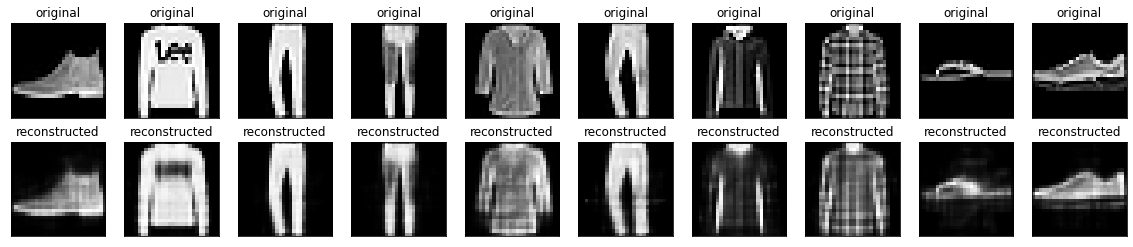

In [10]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
x_train.shape

(60000, 28, 28)

In [13]:
from keras import regularizers

encoding_dim = 32
class Sparse(Model):
  def __init__(self):
    super(Sparse, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Flatten(),
      layers.Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5)),
    ])

    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28,28,1))
      ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
autoencoder = Sparse()

In [14]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 3s 11ms/step - loss: 0.5047 - val_loss: 0.3501
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.3409 - val_loss: 0.3274
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.3224 - val_loss: 0.3164
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.3126 - val_loss: 0.3089
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.3047 - val_loss: 0.3037
Epoch 6/20
235/235 [==============================] - 2s 11ms/step - loss: 0.3011 - val_loss: 0.3002
Epoch 7/20
235/235 [==============================] - 2s 11ms/step - loss: 0.2975 - val_loss: 0.2977
Epoch 8/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2953 - val_loss: 0.2958
Epoch 9/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2931 - val_loss: 0.2947
Epoch 10/20
235/235 [==============================] - 2s 11ms/step - loss: 0.2932 - val_lo

In [17]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

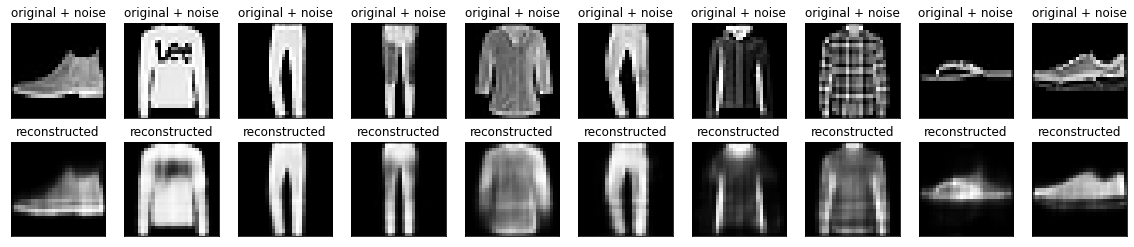

In [18]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test[i]))

    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()
